# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data

In [2]:
df = pd.read_csv("data_dm3.csv",header=None)
A = np.array(df)
print(A.shape)
X = A[:,range(A.shape[1]-1)]      #on récupère les covariables
Y = A[:,(A.shape[1]-1)]           #puis l'output

n, d = X.shape
print("La dimension de la matrice X est: {0} x {1}".format(n, d))

(442, 211)
La dimension de la matrice X est: 442 x 210


# 2. Nature des variables

# X : Centrée et réduite? 

In [3]:
mean_X = np.mean(X, axis = 1)
mean_X[:5]

array([ 0.01486179, -0.00058525,  0.03631406,  0.12522978, -0.03024942])

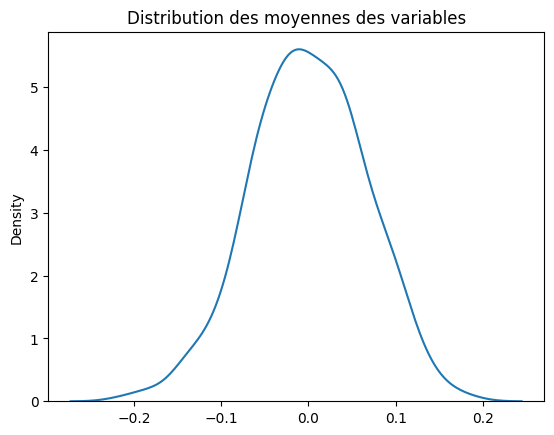

In [4]:
plt.figure()
sns.kdeplot(mean_X)
plt.title("Distribution des moyennes des variables")
plt.show()

Ils sont tous proche de 0, ce qui signifie que les variables ont été centré et réduite (avec la modification de l'écart type aussi). 

## Y : Centrée et réduite?

In [5]:
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_mean, Y_std

(np.float64(152.13348416289594), np.float64(77.00574586945044))

Non, la variable n'est pas centrée et réduite. La moyenne est égale à 152 qui est très loin de 0.

## Scatterplot de 04 features prises au hasard

In [6]:
df_sub = pd.DataFrame(X[:,np.random.choice(range(210),4)])
df_sub['y'] = Y

In [7]:
df_sub

,0,1,2,3,y
0,-0.441891,-1.244537,1.740494,1.438662,151.0
1,-1.493573,1.858089,0.015812,-0.349194,75.0
2,-0.697817,1.930568,-0.069715,-0.257719,141.0
3,-0.691796,-0.441214,-0.431021,0.187025,206.0
4,1.282331,-0.391935,-0.863385,-0.877800,135.0
...,...,...,...,...,...
437,0.642697,0.628963,-0.195459,-1.583915,178.0
438,1.139926,-1.756169,0.002005,0.917024,104.0
439,0.243844,0.727757,-0.052641,-0.610663,132.0
440,-0.607681,-0.354085,-0.003720,-1.100426,220.0


<Figure size 640x480 with 0 Axes>

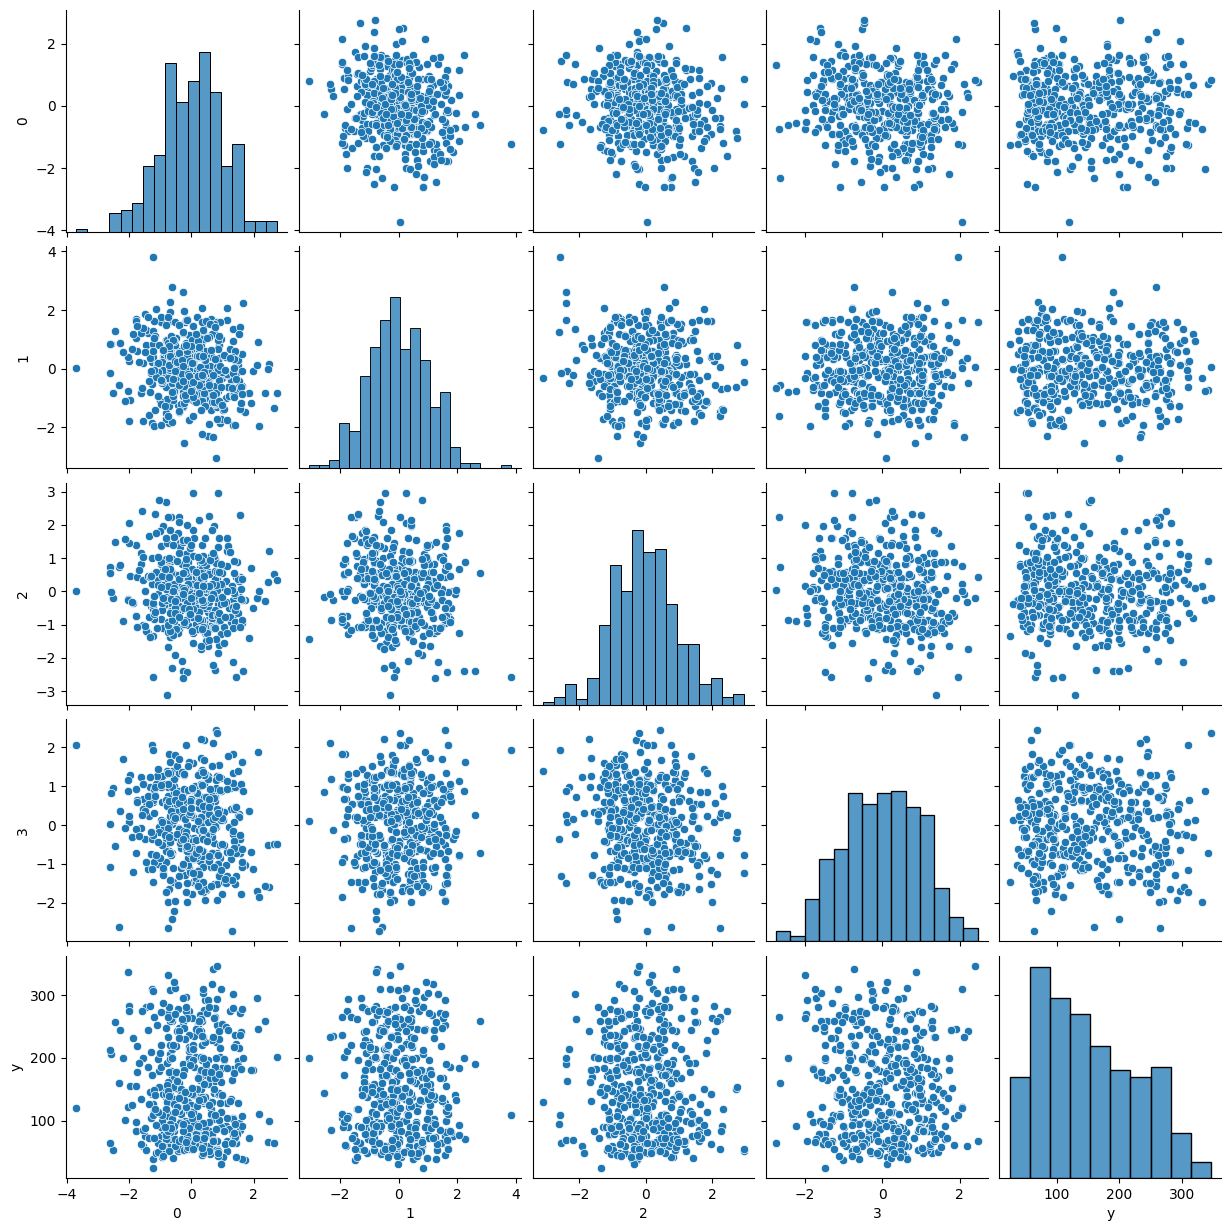

In [8]:
plt.figure()
sns.pairplot(df_sub)
plt.show()

Commentaire attendu : Les covariables séléctionées semblent peu corrélées entre elle. Elles sont aussi peu corrélées avec la variable explicative.

# 3. Split des données

In [9]:
df = pd.DataFrame(X)
df["y"] = Y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("y", axis = 1), df["y"], 
                                                    test_size = 0.2,
                                                    random_state = 42) 

In [11]:
print("taille des features d'entrainement :", X_train.shape)
print("taille des features de test :", X_test.shape)

taille des features d'entrainement : (353, 210)
taille des features de test : (89, 210)


# 4. Aanalyse du mérite de l'ACP

In [12]:
# Calcul de la corrélation
correlation = df.corr()
correlation

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,y
0,1.000000,-0.142086,-0.041896,-0.302272,0.138538,0.152145,-0.060964,-0.177809,0.006485,-0.052305,...,-0.058302,0.023301,0.032539,-0.058217,0.001804,-0.109111,-0.016684,0.164832,-0.051954,0.005017
1,-0.142086,1.000000,0.089454,-0.238143,-0.118706,-0.100456,0.147430,-0.121557,0.039698,-0.111136,...,-0.039701,-0.044379,-0.235257,-0.030673,0.077185,0.000847,-0.130910,-0.070838,0.063598,0.026596
2,-0.041896,0.089454,1.000000,-0.187086,0.140798,-0.073608,-0.077142,0.027821,-0.058874,-0.148022,...,0.000215,0.134172,0.038721,0.005670,0.088443,-0.030013,-0.325989,0.018941,-0.129928,0.071163
3,-0.302272,-0.238143,-0.187086,1.000000,0.011364,-0.073047,0.146828,-0.076386,0.074364,0.020403,...,0.025894,-0.120239,0.127989,-0.020208,-0.212420,0.084643,0.004350,-0.169209,-0.370631,0.029510
4,0.138538,-0.118706,0.140798,0.011364,1.000000,-0.022188,0.004966,0.182345,0.005433,0.122424,...,-0.009427,0.111639,-0.067095,-0.122180,-0.111999,0.043107,-0.024601,0.030615,-0.085896,0.037828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.109111,0.000847,-0.030013,0.084643,0.043107,0.044751,0.037206,-0.039508,-0.096749,0.127220,...,0.007618,-0.027597,-0.069641,0.148329,-0.004620,1.000000,0.096104,0.035464,0.092672,-0.028528
207,-0.016684,-0.130910,-0.325989,0.004350,-0.024601,0.222343,0.093393,-0.242652,-0.189140,0.120465,...,-0.065396,-0.109745,0.117672,0.006786,-0.109880,0.096104,1.000000,-0.133995,0.311864,-0.043208
208,0.164832,-0.070838,0.018941,-0.169209,0.030615,0.066556,0.041634,-0.048685,0.051977,0.115184,...,-0.089484,0.072415,-0.016290,0.064745,0.033546,0.035464,-0.133995,1.000000,0.030848,0.077200
209,-0.051954,0.063598,-0.129928,-0.370631,-0.085896,0.138483,0.015815,0.042129,-0.184190,0.108683,...,0.002441,-0.060985,-0.060283,0.048210,-0.137616,0.092672,0.311864,0.030848,1.000000,-0.058739


<Axes: >

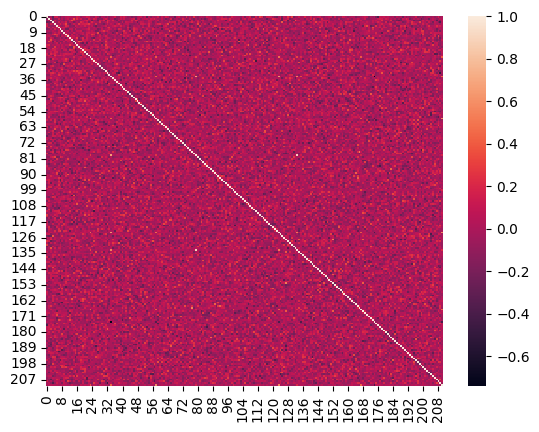

In [13]:
sns.heatmap(correlation)

y moins de corrélations qui sont très visibles. Essayons maintenant d'analyser les valeurs propres 

In [14]:
var = np.cov(np.cov(X,rowvar = False))
U, s, V = np.linalg.svd(var, full_matrices=True)

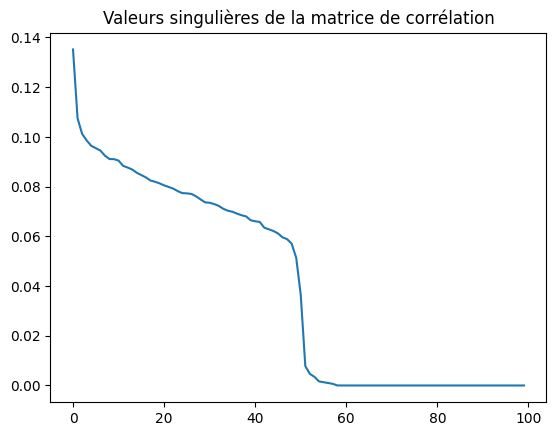

In [15]:
fig = plt.figure()
plt.plot(s[0:100])
plt.title('Valeurs singulières de la matrice de corrélation')
plt.show()

In [16]:
# Voyons où est le décrochage des valeurs propres
s[:53]

array([0.13517994, 0.1074511 , 0.1012125 , 0.09857041, 0.09642494,
       0.09546611, 0.09452357, 0.09245867, 0.09110884, 0.09104954,
       0.09047554, 0.08835407, 0.08767628, 0.08687571, 0.08557741,
       0.08464301, 0.08371561, 0.08246136, 0.08196116, 0.08131866,
       0.08051425, 0.07986732, 0.07920439, 0.07818563, 0.07739247,
       0.07729229, 0.07705869, 0.07612695, 0.07486745, 0.07367525,
       0.07351291, 0.07297818, 0.07224924, 0.07106577, 0.07031091,
       0.06988322, 0.06914402, 0.06849567, 0.06802127, 0.06647538,
       0.0660644 , 0.0657946 , 0.06347313, 0.06282021, 0.06215168,
       0.06116787, 0.05960611, 0.05887875, 0.05705045, 0.05139963,
       0.03641995, 0.00781631, 0.0046766 ])

On remarque que seulement les 51 premières valeurs sont (significativement) différentes de 0. Ceci veut dire que la matrice de design est de rang déficient (51 < 210). Ainsi tenter une statégie de type ''PCA before OLS'' est légitime. On enregistre l'indice de la dernière valeur propre non-nulle.

## 5.Appliquer PCA before OLS 

### OLS without PCA

In [17]:
X_train_denormalized = X_train.apply(
    lambda row: row * row.std() + row.mean(),
    axis=1
)

In [18]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
17,-0.253383,1.023499,-0.769146,0.197786,-1.673678,-0.019326,0.423526,-0.500073,0.882380,-1.211418,...,-0.654504,-0.229018,-0.278687,-0.224399,-0.221916,1.119785,-0.703094,-0.016182,-0.682661,-0.305046
66,-0.823219,-0.787145,0.312949,0.135048,-1.108392,-0.521181,0.217666,0.335952,1.072136,0.603061,...,1.546122,1.708856,0.143814,0.458813,-0.670878,0.097503,-0.788170,0.585283,-0.975814,0.767905
137,-0.483985,0.896387,-0.933982,-0.350163,-0.973192,1.129781,-0.176635,-0.555079,0.357356,-0.640552,...,-0.806111,-0.730898,1.537600,-0.514625,-0.306158,0.397642,-0.644912,-0.380885,-0.331522,-1.483141
245,0.304216,-1.326658,-0.318999,0.818733,1.199750,0.867217,-1.992611,3.616718,-2.274064,0.139502,...,-1.356249,-0.750906,-1.001635,-0.233250,1.244301,-0.217263,0.830386,-1.451051,0.738890,-0.915460
31,-0.675979,1.470721,-0.602462,-0.163663,0.387527,-1.004284,1.694974,1.034009,-0.435057,-0.408983,...,-1.064730,-0.281538,-1.559095,0.018656,-0.707182,1.431244,1.834674,0.339627,0.863694,-0.888811


In [19]:
X_train_denormalized.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
17,-0.176625,0.748870,-0.550455,0.150386,-1.206068,-0.006979,0.314004,-0.355429,0.646586,-0.871018,...,-0.467361,-0.158965,-0.194966,-0.155617,-0.153818,0.818659,-0.502580,-0.004700,-0.487770,-0.214071
66,-0.781860,-0.750218,0.214727,0.058682,-1.031999,-0.516928,0.131150,0.234905,0.880647,0.469199,...,1.296403,1.439144,0.066371,0.342672,-0.648235,0.025749,-0.751116,0.453604,-0.915708,0.613791
137,-0.480980,0.768330,-0.888251,-0.359864,-0.923737,0.979564,-0.202812,-0.545324,0.280478,-0.622681,...,-0.772520,-0.704449,1.348661,-0.508711,-0.320037,0.316940,-0.626627,-0.387669,-0.342993,-1.385269
245,0.263795,-1.512840,-0.415121,0.824297,1.239368,0.877114,-2.238314,3.872355,-2.544923,0.084359,...,-1.545077,-0.885630,-1.158768,-0.321708,1.287901,-0.304292,0.836991,-1.648352,0.737318,-1.064892
31,-0.751318,1.565832,-0.671963,-0.198324,0.396632,-1.105690,1.807891,1.094445,-0.491266,-0.463122,...,-1.170936,-0.325558,-1.704554,-0.001528,-0.784998,1.523221,1.958683,0.344929,0.910607,-0.981048


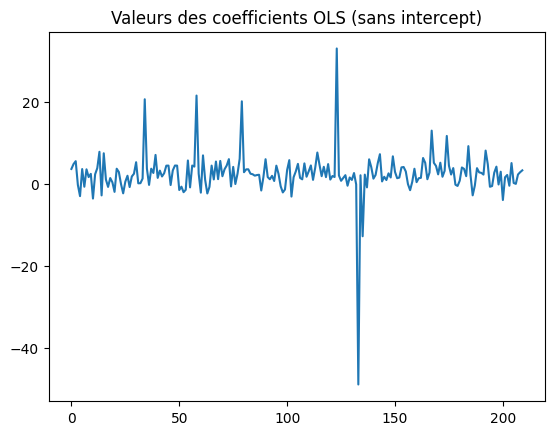

In [20]:
# Présentons les coefficients
reg = LinearRegression()
reg.fit(X_train_denormalized, y_train)
fig = plt.figure()
plt.plot(reg.coef_)
plt.title('Valeurs des coefficients OLS (sans intercept)')
plt.show()

In [21]:
elbow = 60   #50

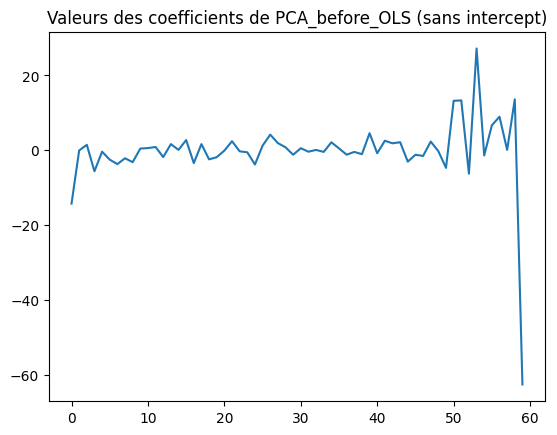

In [23]:
# Confirmons notre analyse de - de 60 variables explicatives significatives
X_train_reduce = np.dot(X_train, U[:,0:elbow])
X_test_reduce = np.dot(X_test, U[:,0:elbow])

regr1 = LinearRegression()
regr1.fit(X_train_reduce , y_train)

fig = plt.figure()
plt.plot(np.r_[regr1.coef_])
plt.title('Valeurs des coefficients de PCA_before_OLS (sans intercept)')
plt.show()